# TASK 1: TITANIC SURVIYAL PREDICTION

Author: Vivek Kumar
    
Batch: NOV BATCH P18
    
Domain: Data Science
    
Aim: To create a model in order to predict how many passengers on the Titanic survived.

In [1]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
print("Size of the dataset: ",df.shape)

Size of the dataset:  (418, 12)


In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df=df.drop(columns='Cabin',axis=1)

In [11]:
#fill the missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
print(df["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [16]:
df.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,1


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,1.363636,30.272590,0.447368,0.392344,35.627188,1.464115
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500,0.685516
min,892.000000,0.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,0.000000,1.000000,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,1.000000,3.000000,2.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,2.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [19]:
print("Target variable frequency distribution:\n",df["Survived"].value_counts())

Target variable frequency distribution:
 Survived
0    266
1    152
Name: count, dtype: int64


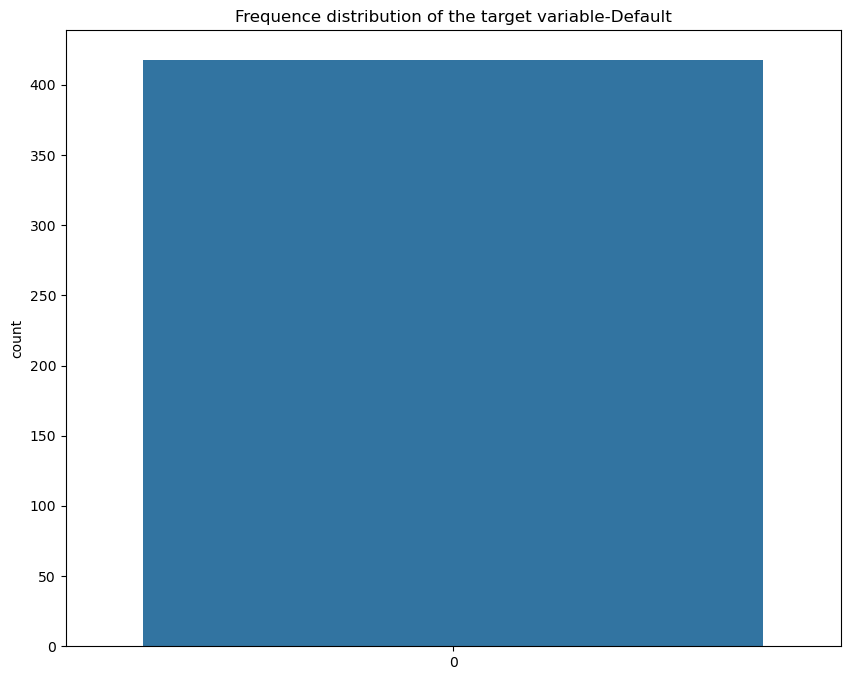

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(df["Survived"])
plt.title("Frequence distribution of the target variable-Default")
plt.show()

In [21]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [22]:
cate_val

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [23]:
cate_val

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [24]:
df_new=df.drop(columns=['Name', 'Age','Sex', 'Ticket','Embarked'])
df_new

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,892,0,3,0,0,7.8292
1,893,1,3,1,0,7.0000
2,894,0,2,0,0,9.6875
3,895,0,3,0,0,8.6625
4,896,1,3,1,1,12.2875
...,...,...,...,...,...,...
413,1305,0,3,0,0,8.0500
414,1306,1,1,0,0,108.9000
415,1307,0,3,0,0,7.2500
416,1308,0,3,0,0,8.0500


In [25]:
cn=df_new.corr()
cn

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,0.001087,0.018721,-0.576619
SibSp,0.003818,0.099943,0.001087,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.171488,0.230001,1.000000


<Axes: >

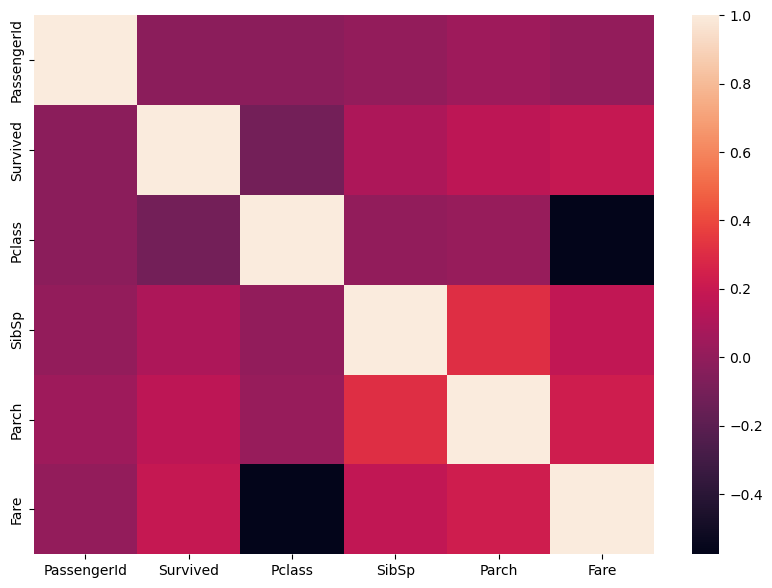

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(cn)

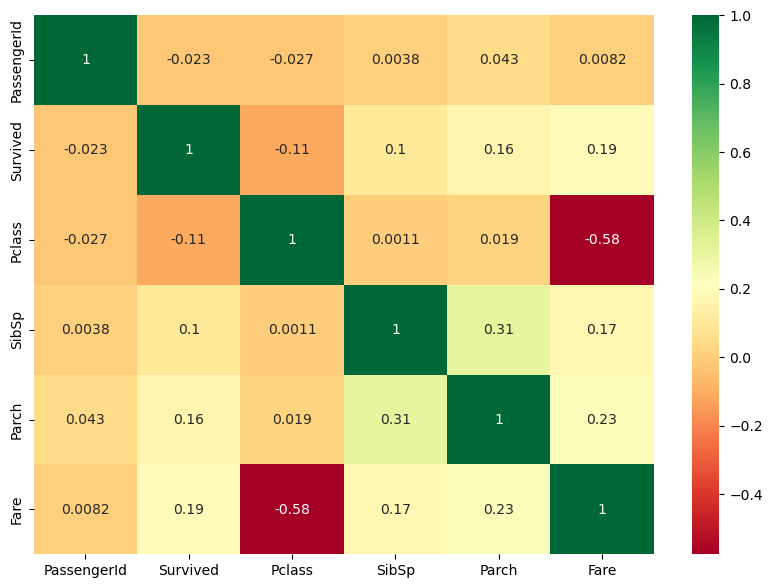

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(cn,annot=True,cmap="RdYlGn")
plt.show()

In [28]:
x=df[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=df["Survived"]

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

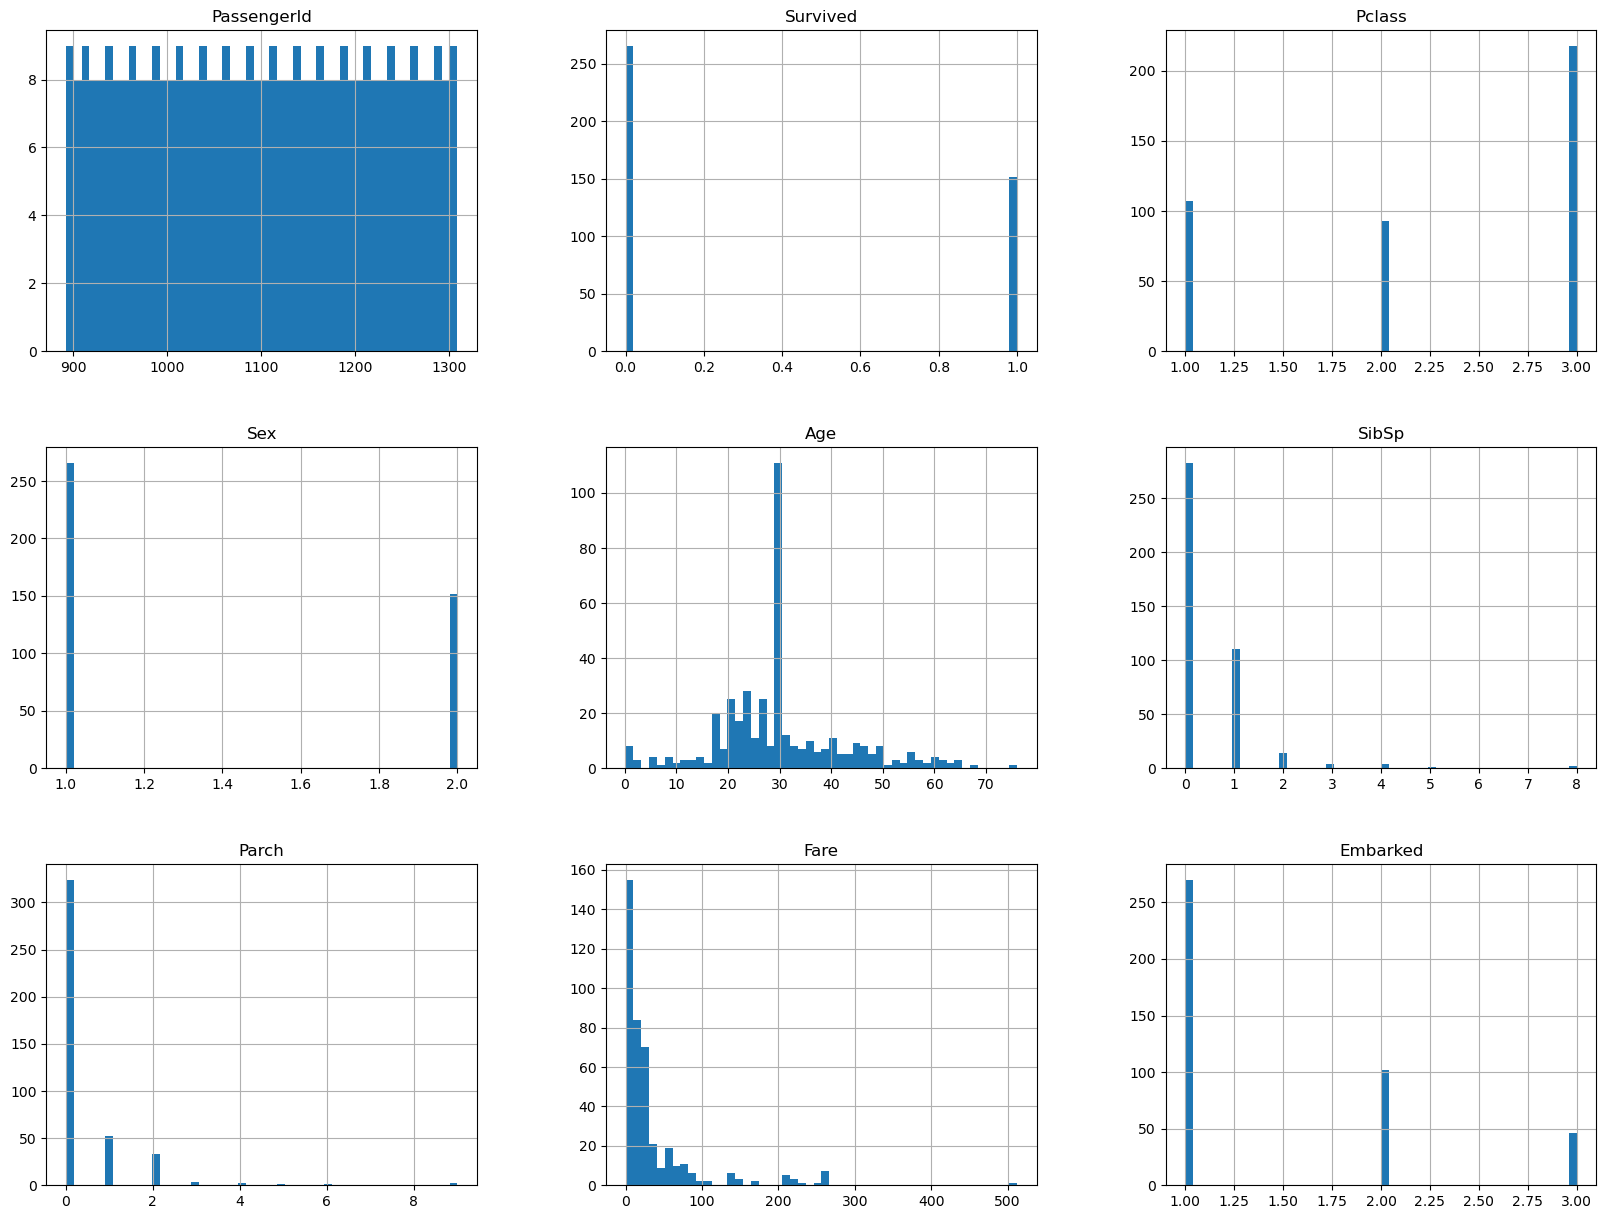

In [29]:
df.hist(bins=50,figsize=(20,15))

array([[<Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>],
       [<Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='SibSp', ylabel='Fare'>],
       [<Axes: xlabel='Pclass', ylabel='SibSp'>,
        <Axes: xlabel='Fare', ylabel='SibSp'>,
        <Axes: xlabel='SibSp', ylabel='SibSp'>]], dtype=object)

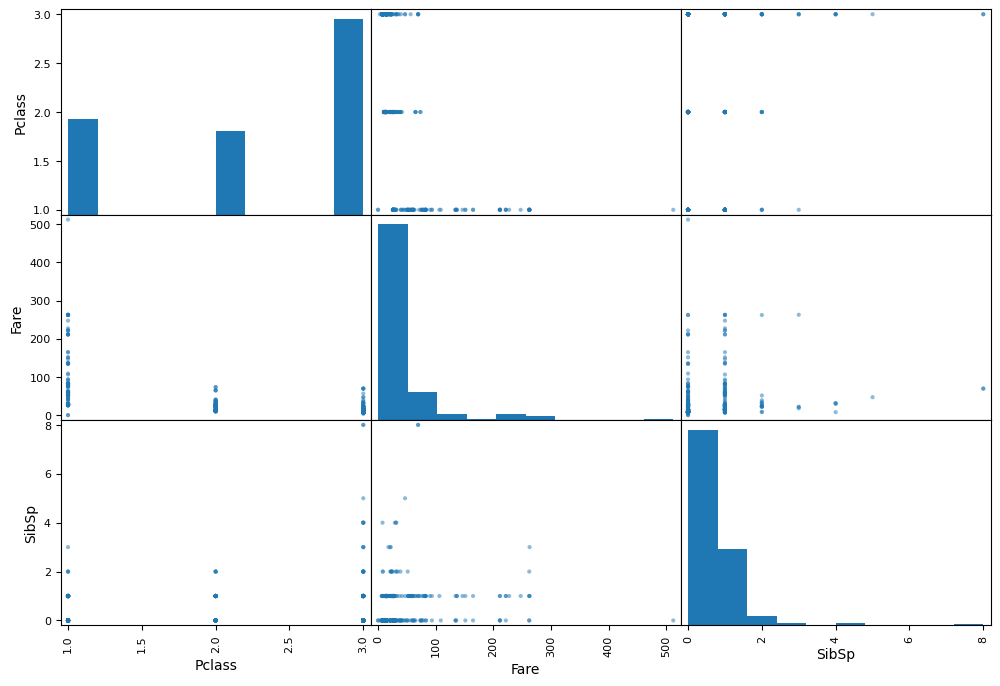

In [30]:
from pandas.plotting import scatter_matrix
attributes=["Pclass","Fare","SibSp"]
scatter_matrix(df_new[attributes],figsize=(12,8))

<Axes: xlabel='Survived', ylabel='Density'>

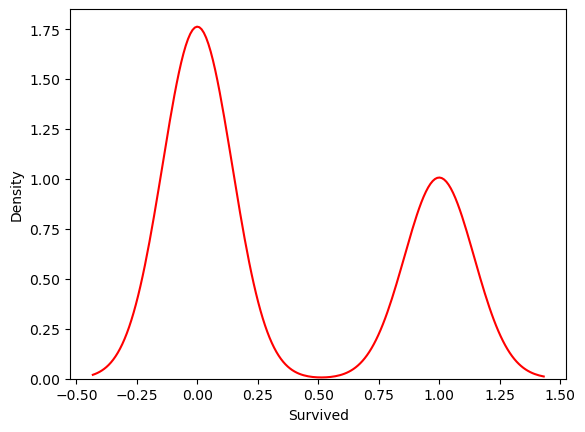

In [31]:
sns.kdeplot(df["Survived"],color = 'red')

In [32]:
df_new['Pclass']

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [33]:
df_new['Pclass'].unique()

array([3, 2, 1])

In [34]:
df_new.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,892,0,3,0,0,7.8292
1,893,1,3,1,0,7.0000
2,894,0,2,0,0,9.6875
3,895,0,3,0,0,8.6625
4,896,1,3,1,1,12.2875


In [35]:
df_new.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,892,0,3,0,0,7.8292
1,893,1,3,1,0,7.0000
2,894,0,2,0,0,9.6875
3,895,0,3,0,0,8.6625
4,896,1,3,1,1,12.2875


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [38]:
print("Size of training data : ", x_train.shape[0])
print("Size of test data : ", x_test.shape[0])

Size of training data :  334
Size of test data :  84


In [39]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
336,1228,2,1,32.00000,0,0,13.0000,1
31,923,2,1,24.00000,2,0,31.5000,1
84,976,2,1,30.27259,0,0,10.7083,3
287,1179,1,1,24.00000,1,0,82.2667,1
317,1209,2,1,19.00000,0,0,10.5000,1
...,...,...,...,...,...,...,...,...
71,963,3,1,21.00000,0,0,7.8958,1
106,998,3,1,21.00000,0,0,7.8208,3
270,1162,1,1,46.00000,0,0,75.2417,2
348,1240,2,1,24.00000,0,0,13.5000,1


In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
min_max.fit(x_train)
train_transformed = min_max.transform(x_train)
transformed = min_max.transform(x_test)
transformed

array([[ 0.76923077,  1.        ,  0.        ,  0.32602088,  0.        ,
         0.        ,  0.01411046,  0.5       ],
       [ 0.77644231,  0.        ,  1.        ,  0.51103476,  0.        ,
         0.        ,  0.41250333,  0.        ],
       [ 0.93028846,  1.        ,  0.        ,  0.27315977,  0.        ,
         0.        ,  0.01512699,  1.        ],
       [ 0.13221154,  1.        ,  0.        ,  0.45817365,  0.        ,
         0.        ,  0.01541158,  0.        ],
       [ 0.36538462,  1.        ,  1.        ,  0.47138893,  0.        ,
         0.22222222,  0.02378022,  0.        ],
       [ 0.06971154,  0.5       ,  0.        ,  0.6564028 ,  0.125     ,
         0.        ,  0.05074862,  0.        ],
       [ 0.17067308,  1.        ,  1.        ,  0.37888199,  0.        ,
         0.        ,  0.01546857,  0.        ],
       [ 0.19471154,  0.        ,  0.        ,  0.64318752,  0.        ,
         0.        ,  0.05074862,  0.        ],
       [ 0.61778846,  0.5       

In [41]:
x_train["Pclass_normalized"] = train_transformed[:,0]
x_train["SibSp_normalized"] = train_transformed[:,1]
x_train["PassengerId_normalised"] = train_transformed[:,2]
x_train["Sex_normalised"] = train_transformed[:,3]
x_train["Parch_normalised"] = train_transformed[:,4]
x_train["Embarked_normalised"] = train_transformed[:,5]
x_train["Fare_normalised"] = train_transformed[:,3]
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_normalized,SibSp_normalized,PassengerId_normalised,Sex_normalised,Parch_normalised,Embarked_normalised,Fare_normalised
336,1228,2,1,32.00000,0,0,13.0000,1,0.805288,0.5,0.0,0.418528,0.000,0.0,0.418528
31,923,2,1,24.00000,2,0,31.5000,1,0.072115,0.5,0.0,0.312806,0.250,0.0,0.312806
84,976,2,1,30.27259,0,0,10.7083,3,0.199519,0.5,0.0,0.395700,0.000,0.0,0.395700
287,1179,1,1,24.00000,1,0,82.2667,1,0.687500,0.0,0.0,0.312806,0.125,0.0,0.312806
317,1209,2,1,19.00000,0,0,10.5000,1,0.759615,0.5,0.0,0.246729,0.000,0.0,0.246729


In [42]:
x_test["Pclass_normalized"] = transformed[:,0]
x_test["SibSp_normalized"] = transformed[:,1]
x_test["PassengerId_normalised"] = transformed[:,2]
x_test["Sex_normalised"] = transformed[:,3]
x_test["Parch_normalised"] = transformed[:,4]
x_test["Embarked_normalised"] = transformed[:,5]
x_test["Fare_normalised"] = transformed[:,3]
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_normalized,SibSp_normalized,PassengerId_normalised,Sex_normalised,Parch_normalised,Embarked_normalised,Fare_normalised
321,1213,3,1,25.0,0,0,7.2292,2,0.769231,1.0,0.0,0.326021,0.0,0.000000,0.326021
324,1216,1,2,39.0,0,0,211.3375,1,0.776442,0.0,1.0,0.511035,0.0,0.000000,0.511035
388,1280,3,1,21.0,0,0,7.7500,3,0.930288,1.0,0.0,0.273160,0.0,0.000000,0.273160
56,948,3,1,35.0,0,0,7.8958,1,0.132212,1.0,0.0,0.458174,0.0,0.000000,0.458174
153,1045,3,2,36.0,0,2,12.1833,1,0.365385,1.0,1.0,0.471389,0.0,0.222222,0.471389


# Apply All Algorithm
#The test accuracy, precision, recall, f1-score support of the dataset

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [44]:
knn =  KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(x_train[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]], y_train)
pred= knn.predict(x_test[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]])
test_accuracy = accuracy_score(y_test, pred)
test_accuracy
print(f'Test Accuracy Data: {test_accuracy}')


Test Accuracy Data: 0.6547619047619048


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the training data
x_train_normalized = scaler.fit_transform(x_train[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# Transform the test data using the same scaler
x_test_normalized = scaler.transform(x_test[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# Train and predict using the normalized data
knn.fit(x_train_normalized, y_train)
pred_normalized = knn.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized)
print(f'Test Accuracy with Normalized Data: {test_accuracy_normalized}')


Test Accuracy with Normalized Data: 1.0


In [46]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [47]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,42,8
Yes,21,13


In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        50
           1       0.62      0.38      0.47        34

    accuracy                           0.65        84
   macro avg       0.64      0.61      0.61        84
weighted avg       0.65      0.65      0.63        84



#    Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred1=log.predict(x_test)
accuracy_score(y_test,y_pred1)

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [51]:
log=LogisticRegression()
x_train_normalized = scaler.fit_transform(x_train[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# Transform the test data using the same scaler
x_test_normalized = scaler.transform(x_test[["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# Train and predict using the normalized data
log.fit(x_train_normalized, y_train)
pred1= log.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred1)
print(f'Test Accuracy with Normalized Data: {test_accuracy_normalized}')


Test Accuracy with Normalized Data: 1.0


In [52]:
cm = confusion_matrix(y_test, pred1)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,0,34


In [53]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# SVM

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the SVM classifier
svm = SVC()

# Fit the SVM model to the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')



Accuracy: 0.5952380952380952


In [55]:
cm = confusion_matrix(y_test, y_pred2)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,34,0


In [56]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()
dt.fit(x_train[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]], y_train)
pred3 = dt.predict(x_test[["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]])
test_accuracy = accuracy_score(y_test, pred3)
test_accuracy
print(f'Test Accuracy Data: {test_accuracy}')

Test Accuracy Data: 1.0


In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred3=dt.predict(x_test)

In [61]:
accuracy_score(y_test,y_pred3)

1.0

In [62]:
cm = confusion_matrix(y_test, y_pred3)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,0,34


In [63]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf=RandomForestClassifier()

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred4=rf.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred4)

1.0

In [69]:
cm = confusion_matrix(y_test, y_pred4)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,0,34


In [70]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc=GradientBoostingClassifier()

In [73]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
y_pred5=gbc.predict(x_test)

In [75]:
accuracy_score(y_test,y_pred5)

1.0

In [76]:
cm = confusion_matrix(y_test, y_pred5)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,0,34


In [77]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# GaussianNB

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
gnb=GaussianNB()

In [80]:
gnb.fit(x_train,y_train)

GaussianNB()

In [81]:
y_pred6=gnb.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred6)

1.0

In [83]:
cm = confusion_matrix(y_test, y_pred6)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,50,0
Yes,0,34


In [84]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [85]:
final_df=pd.DataFrame({'Models':['KNN','LR','SVM','DT','RF','GB','NB'],
                  'ACC':[accuracy_score(y_test,pred),
                         accuracy_score(y_test,pred1),
                         accuracy_score(y_test,y_pred2),
                         accuracy_score(y_test,y_pred3),
                         accuracy_score(y_test,y_pred4),
                         accuracy_score(y_test,y_pred5),
                        accuracy_score(y_test,y_pred6)]})

In [86]:
final_df

,Models,ACC
0,KNN,0.654762
1,LR,1.000000
2,SVM,0.595238
3,DT,1.000000
4,RF,1.000000
5,GB,1.000000
6,NB,1.000000


In [87]:
import seaborn as sns

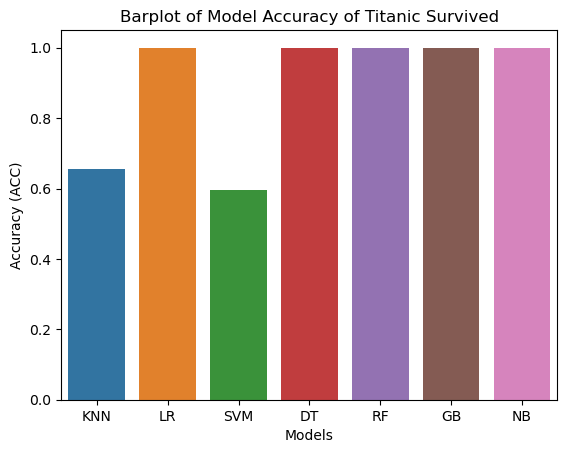

In [88]:
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of Titanic Survived')

plt.show()

In [89]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [90]:
x.shape

(418, 10)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
df=pd.get_dummies(x,columns=['Sex'],drop_first=True)

In [93]:
lr=LogisticRegression()

In [94]:
lr.fit(x_train,y_train)

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
#predicting value
sum(df['Age'].isnull())

0

In [96]:
df=df.dropna()

In [97]:
sum(df['Age'].isnull())

0

In [98]:
x_train_pred=lr.predict(x_train)

In [99]:
print(x_train_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]


In [100]:
print(y_test)

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64


In [117]:
x_test_pred = lr.predict(x_test)

# Calculating the survival rate
survival_rate = x_test_pred.mean()

if survival_rate >0:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.


In [118]:
x_test_pred = lr.predict(x_test)

# Calculating the survival rate
survival_rate = x_test_pred.mean()

if survival_rate <0:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

I'm sorry, but you have failed to survive.
